# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import os


# Import API key
#from api_keys import weather_api_key
weather_api_key="6020e2b12a7c05c4875876dd60ea6b5d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#This should have my key imported instead of set as a variable, but my attempts to do that failed. How do I fix this? Use < ..>
#in front of it?

## Generate Cities List

In [85]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city


# Get weather data

weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")


The weather API responded with: {'coord': {'lon': 72.93, 'lat': 0.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 301.67, 'feels_like': 304.77, 'temp_min': 301.67, 'temp_max': 301.67, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 281}, 'clouds': {'all': 31}, 'dt': 1603648107, 'sys': {'country': 'MV', 'sunrise': 1603586956, 'sunset': 1603630509}, 'timezone': 18000, 'id': 1337610, 'name': 'Thinadhoo', 'cod': 200}.


In [87]:
# # Make a request for each of the indices

# cities_weather_response=[]

# for city in range(len(cities)):
#     print(f"Making request number: {city} for ID: {cities[city]}")

#     # Get one of the posts
#     
#     request_response = requests.get(query_url + str(city))

#     # Save post's JSON
#cities_weather_response.append(request_response.json())

In [88]:
count=1
country=[]
latitude=[]
longitude=[]
humidity=[]
cloudiness=[]
wind_speed=[]
max_temp=[]
city_list=[]
date=[]

for city in cities:
    count += 1
    print(city + ': ' + str(count))
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    try:
        time.sleep(1)
        response = requests.get(query_url).json()
        print(f"The weather API responded with: {response}.")
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        date.append(response['dt'])
        city_list.append(city)
    except:
        print("That city doesn't exist-Skipping")
    continue

ukiah: 2
The weather API responded with: {'coord': {'lon': -123.21, 'lat': 39.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.27, 'feels_like': 285.25, 'temp_min': 284.15, 'temp_max': 288.15, 'pressure': 1015, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.49, 'deg': 163}, 'clouds': {'all': 90}, 'dt': 1603648039, 'sys': {'type': 1, 'id': 6129, 'country': 'US', 'sunrise': 1603636404, 'sunset': 1603675201}, 'timezone': -25200, 'id': 5404476, 'name': 'Ukiah', 'cod': 200}.
atuona: 3
The weather API responded with: {'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.01, 'feels_like': 297.11, 'temp_min': 299.01, 'temp_max': 299.01, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 76}, 'rain': {'1h': 0.

The weather API responded with: {'coord': {'lon': -73.97, 'lat': 42.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.12, 'feels_like': 278.39, 'temp_min': 280.93, 'temp_max': 283.15, 'pressure': 1022, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 2.58, 'deg': 36}, 'clouds': {'all': 63}, 'dt': 1603648125, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1603624885, 'sunset': 1603663087}, 'timezone': -14400, 'id': 5106841, 'name': 'Albany', 'cod': 200}.
mys shmidta: 18
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
That city doesn't exist-Skipping
hermanus: 19
The weather API responded with: {'coord': {'lon': 19.23, 'lat': -34.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.26, 'feels_like': 289.58, 'temp_min': 289.26, 'temp_max': 289.26, 'pressure': 1020, 'humid

The weather API responded with: {'coord': {'lon': 50.28, 'lat': -14.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.03, 'feels_like': 295.7, 'temp_min': 295.03, 'temp_max': 295.03, 'pressure': 1018, 'humidity': 82, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.45, 'deg': 183}, 'clouds': {'all': 1}, 'dt': 1603648143, 'sys': {'country': 'MG', 'sunrise': 1603591565, 'sunset': 1603636771}, 'timezone': 10800, 'id': 1071296, 'name': 'Antalaha', 'cod': 200}.
rikitea: 33
The weather API responded with: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 295.16, 'feels_like': 293.44, 'temp_min': 295.16, 'temp_max': 295.16, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.19, 'deg': 322}, 'rain': {'1

The weather API responded with: {'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.28, 'feels_like': 292.29, 'temp_min': 292.28, 'temp_max': 292.28, 'pressure': 1020, 'humidity': 80, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 275}, 'clouds': {'all': 57}, 'dt': 1603648161, 'sys': {'country': 'ZA', 'sunrise': 1603595947, 'sunset': 1603643615}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}.
nikolskoye: 48
The weather API responded with: {'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.63, 'feels_like': 276.52, 'temp_min': 278.15, 'temp_max': 279.15, 'pressure': 1014, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1603648162, 

The weather API responded with: {'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 309.52, 'feels_like': 304.34, 'temp_min': 309.52, 'temp_max': 309.52, 'pressure': 1012, 'humidity': 10, 'sea_level': 1012, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 4.53, 'deg': 42}, 'clouds': {'all': 93}, 'dt': 1603648179, 'sys': {'country': 'MR', 'sunrise': 1603608668, 'sunset': 1603650064}, 'timezone': 0, 'id': 2381334, 'name': 'Atar', 'cod': 200}.
nanortalik: 64
The weather API responded with: {'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 274.44, 'feels_like': 265.95, 'temp_min': 274.44, 'temp_max': 274.44, 'pressure': 992, 'humidity': 89, 'sea_level': 992, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 9.23, 'deg': 82}, 'rain': {'1h': 0.

The weather API responded with: {'coord': {'lon': 167.68, 'lat': -46.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 280.37, 'feels_like': 278.96, 'temp_min': 280.37, 'temp_max': 280.37, 'pressure': 1020, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 318, 'gust': 1.79}, 'clouds': {'all': 100}, 'dt': 1603648195, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1603647302, 'sunset': 1603697474}, 'timezone': 46800, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}.
pevek: 78
The weather API responded with: {'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.92, 'feels_like': 265.55, 'temp_min': 269.92, 'temp_max': 269.92, 'pressure': 1018, 'humidity': 97, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 1176, 'wind': {'speed': 2.73, 'deg': 280},

The weather API responded with: {'coord': {'lon': 87.92, 'lat': 22.3}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 300.15, 'feels_like': 304.86, 'temp_min': 300.15, 'temp_max': 300.15, 'pressure': 1010, 'humidity': 83}, 'visibility': 3000, 'wind': {'speed': 1.47, 'deg': 284}, 'clouds': {'all': 20}, 'dt': 1603648218, 'sys': {'type': 1, 'id': 9114, 'country': 'IN', 'sunrise': 1603584532, 'sunset': 1603625738}, 'timezone': 19800, 'id': 1255046, 'name': 'Tamlūk', 'cod': 200}.
alakurtti: 94
The weather API responded with: {'coord': {'lon': 30.35, 'lat': 66.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.48, 'feels_like': 268.22, 'temp_min': 271.48, 'temp_max': 271.48, 'pressure': 1009, 'humidity': 94}, 'visibility': 2340, 'wind': {'speed': 1.34, 'deg': 134, 'gust': 3.58}, 'clouds': {'all': 97}, 'dt': 1603648219, 'sys': {'type': 3

The weather API responded with: {'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 277.25, 'feels_like': 273.34, 'temp_min': 277.25, 'temp_max': 277.25, 'pressure': 1032, 'humidity': 63, 'sea_level': 1032, 'grnd_level': 943}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 127}, 'clouds': {'all': 0}, 'dt': 1603648234, 'sys': {'country': 'CN', 'sunrise': 1603671163, 'sunset': 1603709241}, 'timezone': 28800, 'id': 1529484, 'name': 'Kumul', 'cod': 200}.
praia: 108
The weather API responded with: {'coord': {'lon': -23.51, 'lat': 14.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.15, 'feels_like': 298.36, 'temp_min': 303.15, 'temp_max': 303.15, 'pressure': 1012, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 11.3, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1603648236, 'sys': {'type': 1, 'id

The weather API responded with: {'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.23, 'feels_like': 277.88, 'temp_min': 280.93, 'temp_max': 281.48, 'pressure': 1002, 'humidity': 89}, 'visibility': 5708, 'wind': {'speed': 3.59, 'deg': 175}, 'clouds': {'all': 100}, 'dt': 1603648251, 'sys': {'type': 3, 'id': 2031989, 'country': 'NZ', 'sunrise': 1603646656, 'sunset': 1603696765}, 'timezone': 46800, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}.
san patricio: 122
The weather API responded with: {'coord': {'lon': -97.52, 'lat': 28.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.15, 'feels_like': 299.97, 'temp_min': 299.26, 'temp_max': 302.15, 'pressure': 1013, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1603648252, 'sys': {

The weather API responded with: {'coord': {'lon': 9.78, 'lat': 7.85}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.94, 'feels_like': 302.86, 'temp_min': 299.94, 'temp_max': 299.94, 'pressure': 1009, 'humidity': 67, 'sea_level': 1009, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 1.2, 'deg': 210}, 'clouds': {'all': 38}, 'dt': 1603648269, 'sys': {'country': 'NG', 'sunrise': 1603602493, 'sunset': 1603645281}, 'timezone': 3600, 'id': 2318921, 'name': 'Wukari', 'cod': 200}.
taltal: 137
The weather API responded with: {'coord': {'lon': -70.48, 'lat': -25.4}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 292.33, 'feels_like': 289.33, 'temp_min': 292.33, 'temp_max': 292.33, 'pressure': 1015, 'humidity': 53, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 8821, 'wind': {'speed': 4.11, 'deg': 246}, 'cloud

The weather API responded with: {'coord': {'lon': -122.47, 'lat': 49.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.93, 'feels_like': 271.77, 'temp_min': 275.37, 'temp_max': 276.48, 'pressure': 1036, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 44}, 'clouds': {'all': 73}, 'dt': 1603648202, 'sys': {'type': 3, 'id': 2001730, 'country': 'CA', 'sunrise': 1603637219, 'sunset': 1603674031}, 'timezone': -25200, 'id': 7669018, 'name': 'Aldergrove', 'cod': 200}.
catamarca: 153
The weather API responded with: {'coord': {'lon': -65.79, 'lat': -28.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.93, 'feels_like': 301.46, 'temp_min': 300.93, 'temp_max': 300.93, 'pressure': 1007, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 270, 'gust': 5.36}, 'clouds': {'all': 4}, 'dt': 1603648289,

The weather API responded with: {'coord': {'lon': -40.12, 'lat': -2.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.88, 'feels_like': 301.9, 'temp_min': 303.88, 'temp_max': 303.88, 'pressure': 1007, 'humidity': 57, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 8.96, 'deg': 78}, 'clouds': {'all': 28}, 'dt': 1603648306, 'sys': {'country': 'BR', 'sunrise': 1603613907, 'sunset': 1603657818}, 'timezone': -10800, 'id': 3408368, 'name': 'Acaraú', 'cod': 200}.
hasaki: 169
The weather API responded with: {'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 281.87, 'feels_like': 280.97, 'temp_min': 281.15, 'temp_max': 283.15, 'pressure': 1015, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1603648273, 'sys'

The weather API responded with: {'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.15, 'feels_like': 273.84, 'temp_min': 279.15, 'temp_max': 279.15, 'pressure': 990, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1603648291, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1603615816, 'sunset': 1603647418}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}.
codrington: 183
The weather API responded with: {'coord': {'lon': 141.97, 'lat': -38.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 281.94, 'feels_like': 276.47, 'temp_min': 281.94, 'temp_max': 281.94, 'pressure': 1025, 'humidity': 73, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 111}, 'clouds': {'all': 2}, 'dt':

The weather API responded with: {'coord': {'lon': 42.05, 'lat': 60.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.69, 'feels_like': 268.51, 'temp_min': 272.69, 'temp_max': 272.69, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 2.96, 'deg': 294}, 'clouds': {'all': 61}, 'dt': 1603648338, 'sys': {'country': 'RU', 'sunrise': 1603599550, 'sunset': 1603632735}, 'timezone': 10800, 'id': 474354, 'name': "Verkhovazh'ye", 'cod': 200}.
pangai: 197
The weather API responded with: {'coord': {'lon': -174.35, 'lat': -19.8}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 295.87, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 9.3, 'deg': 90}, 'clouds': {'all': 90}, 'dt':

The weather API responded with: {'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 300.6, 'feels_like': 304.4, 'temp_min': 300.6, 'temp_max': 300.6, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.76, 'deg': 119}, 'rain': {'1h': 0.11}, 'clouds': {'all': 81}, 'dt': 1603648358, 'sys': {'country': 'PG', 'sunrise': 1603655374, 'sunset': 1603699197}, 'timezone': 36000, 'id': 2092164, 'name': 'Lorengau', 'cod': 200}.
georgetown: 211
The weather API responded with: {'coord': {'lon': 100.34, 'lat': 5.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 298.93, 'feels_like': 304.49, 'temp_min': 298.71, 'temp_max': 299.15, 'pressure': 1011, 'humidity': 94}, 'visibility': 7000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 

The weather API responded with: {'coord': {'lon': -99.89, 'lat': 16.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 309.02, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1012, 'humidity': 70}, 'visibility': 9656, 'wind': {'speed': 2.1, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1603648340, 'sys': {'type': 1, 'id': 7103, 'country': 'MX', 'sunrise': 1603629306, 'sunset': 1603671107}, 'timezone': -21600, 'id': 3533462, 'name': 'Acapulco de Juárez', 'cod': 200}.
wenling: 227
The weather API responded with: {'coord': {'lon': 121.36, 'lat': 28.37}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 288.71, 'feels_like': 288.52, 'temp_min': 288.71, 'temp_max': 288.71, 'pressure': 1015, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 337}, 'rain': {'1h': 0.12}, 'clouds': {'all': 8}, 'dt': 160

The weather API responded with: {'coord': {'lon': 145.77, 'lat': -16.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.95, 'feels_like': 296.9, 'temp_min': 294.82, 'temp_max': 297.15, 'pressure': 1008, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 240}, 'clouds': {'all': 57}, 'dt': 1603648128, 'sys': {'type': 1, 'id': 9490, 'country': 'AU', 'sunrise': 1603654907, 'sunset': 1603700384}, 'timezone': 36000, 'id': 2172797, 'name': 'Cairns', 'cod': 200}.
walvis bay: 242
The weather API responded with: {'coord': {'lon': 14.51, 'lat': -22.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 289.24, 'feels_like': 286.71, 'temp_min': 288.15, 'temp_max': 290.15, 'pressure': 1011, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 360}, 'clouds': {'all': 8}, 'dt': 1603648395, 'sys': {'type': 1, 'id'

The weather API responded with: {'coord': {'lon': -34.83, 'lat': -6.98}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.15, 'feels_like': 303.8, 'temp_min': 302.15, 'temp_max': 302.15, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1603648397, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1603612420, 'sunset': 1603656765}, 'timezone': -10800, 'id': 3404558, 'name': 'Cabedelo', 'cod': 200}.
the valley: 262
The weather API responded with: {'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.95, 'feels_like': 304.47, 'temp_min': 301.48, 'temp_max': 304.15, 'pressure': 1015, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1603648420, 'sys': {'type': 1, 

The weather API responded with: {'coord': {'lon': 36.54, 'lat': -14.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.78, 'feels_like': 299.83, 'temp_min': 299.78, 'temp_max': 299.78, 'pressure': 1012, 'humidity': 42, 'sea_level': 1012, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 76}, 'clouds': {'all': 69}, 'dt': 1603648438, 'sys': {'country': 'MZ', 'sunrise': 1603594867, 'sunset': 1603640064}, 'timezone': 7200, 'id': 1047660, 'name': 'Cuamba', 'cod': 200}.
saint-francois: 279
The weather API responded with: {'coord': {'lon': 3.91, 'lat': 46.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285, 'feels_like': 284.55, 'temp_min': 284.82, 'temp_max': 285.15, 'pressure': 1007, 'humidity': 93}, 'visibility': 7000, 'wind': {'speed': 1, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1603648439, 'sys': {

The weather API responded with: {'coord': {'lon': 106.88, 'lat': 47.91}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 271.15, 'feels_like': 264.32, 'temp_min': 271.15, 'temp_max': 271.15, 'pressure': 1021, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 6, 'deg': 310}, 'clouds': {'all': 40}, 'dt': 1603648458, 'sys': {'type': 1, 'id': 9644, 'country': 'MN', 'sunrise': 1603668474, 'sunset': 1603705484}, 'timezone': 28800, 'id': 2028462, 'name': 'Ulaanbaatar', 'cod': 200}.
yagodnoye: 296
The weather API responded with: {'coord': {'lon': 149.67, 'lat': 62.55}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 267.49, 'feels_like': 263.3, 'temp_min': 267.49, 'temp_max': 267.49, 'pressure': 1019, 'humidity': 96, 'sea_level': 1019, 'grnd_level': 951}, 'visibility': 199, 'wind': {'speed': 2.08, 'deg': 331}, 'snow': {'1h': 0.18}, 

The weather API responded with: {'coord': {'lon': 100.48, 'lat': 7.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 303.87, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'rain': {'1h': 0.32}, 'clouds': {'all': 75}, 'dt': 1603648467, 'sys': {'type': 1, 'id': 9282, 'country': 'TH', 'sunrise': 1603667084, 'sunset': 1603709945}, 'timezone': 25200, 'id': 1610780, 'name': 'Hat Yai', 'cod': 200}.
verkhnevilyuysk: 312
The weather API responded with: {'coord': {'lon': 120.32, 'lat': 63.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.14, 'feels_like': 261.07, 'temp_min': 266.14, 'temp_max': 266.14, 'pressure': 1022, 'humidity': 96, 'sea_level': 1022, 'grnd_level': 1008}, 'visibility': 5860, 'wind': {'speed': 3.17, 'deg': 26},

The weather API responded with: {'coord': {'lon': -110.97, 'lat': 29.07}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.9, 'feels_like': 302.57, 'temp_min': 302.04, 'temp_max': 303.71, 'pressure': 1012, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1603648443, 'sys': {'type': 1, 'id': 7129, 'country': 'MX', 'sunrise': 1603632709, 'sunset': 1603673021}, 'timezone': -25200, 'id': 4004898, 'name': 'Hermosillo', 'cod': 200}.
inta: 327
The weather API responded with: {'coord': {'lon': 60.17, 'lat': 66.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.31, 'feels_like': 260.83, 'temp_min': 266.31, 'temp_max': 266.31, 'pressure': 1011, 'humidity': 94, 'sea_level': 1011, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3.73, 'deg': 103}, 'clouds': {'all': 99},

The weather API responded with: {'coord': {'lon': -111.98, 'lat': 26.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 304.78, 'feels_like': 302.99, 'temp_min': 304.78, 'temp_max': 304.78, 'pressure': 1012, 'humidity': 23, 'sea_level': 1012, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 93}, 'clouds': {'all': 8}, 'dt': 1603648511, 'sys': {'country': 'MX', 'sunrise': 1603632808, 'sunset': 1603673407}, 'timezone': -25200, 'id': 3995236, 'name': 'Mulegé', 'cod': 200}.
nome: 342
The weather API responded with: {'coord': {'lon': -165.41, 'lat': 64.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.67, 'feels_like': 271.93, 'temp_min': 275.37, 'temp_max': 276.15, 'pressure': 1012, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 30}, 'clouds': {'all': 90}, 'dt': 1603648236, 'sys': {'t

The weather API responded with: {'coord': {'lon': 126.98, 'lat': 37.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 280.14, 'feels_like': 279.05, 'temp_min': 279.15, 'temp_max': 281.15, 'pressure': 1020, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0.55, 'deg': 331}, 'rain': {'1h': 0.12}, 'clouds': {'all': 1}, 'dt': 1603648120, 'sys': {'type': 1, 'id': 8117, 'country': 'KR', 'sunrise': 1603662646, 'sunset': 1603701664}, 'timezone': 32400, 'id': 1835848, 'name': 'Seoul', 'cod': 200}.
edd: 356
The weather API responded with: {'coord': {'lon': 41.69, 'lat': 13.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 304.21, 'feels_like': 300.69, 'temp_min': 304.21, 'temp_max': 304.21, 'pressure': 1007, 'humidity': 41, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 8, 'deg': 135}, 'clouds': {'all':

The weather API responded with: {'coord': {'lon': -93.22, 'lat': 45.02}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 270.8, 'feels_like': 266.32, 'temp_min': 270.15, 'temp_max': 271.48, 'pressure': 1028, 'humidity': 79}, 'visibility': 4023, 'wind': {'speed': 2.6, 'deg': 360}, 'snow': {'1h': 0.37}, 'clouds': {'all': 90}, 'dt': 1603648545, 'sys': {'type': 1, 'id': 4900, 'country': 'US', 'sunrise': 1603629746, 'sunset': 1603667465}, 'timezone': -18000, 'id': 5044290, 'name': 'Saint Anthony', 'cod': 200}.
porto santo: 372
The weather API responded with: {'coord': {'lon': -16.34, 'lat': 33.07}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.15, 'feels_like': 291.03, 'temp_min': 294.15, 'temp_max': 294.15, 'pressure': 1025, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 16036484

The weather API responded with: {'coord': {'lon': 12.15, 'lat': -15.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.75, 'feels_like': 294.48, 'temp_min': 293.75, 'temp_max': 293.75, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 278}, 'clouds': {'all': 35}, 'dt': 1603648562, 'sys': {'country': 'AO', 'sunrise': 1603600695, 'sunset': 1603645941}, 'timezone': 3600, 'id': 3347019, 'name': 'Mossamedes', 'cod': 200}.
quatre cocos: 386
The weather API responded with: {'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 295.63, 'feels_like': 293.48, 'temp_min': 294.26, 'temp_max': 297.15, 'pressure': 1019, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 160364856

The weather API responded with: {'coord': {'lon': -3, 'lat': 20}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 307.85, 'feels_like': 302.81, 'temp_min': 307.85, 'temp_max': 307.85, 'pressure': 1011, 'humidity': 10, 'sea_level': 1011, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 29}, 'clouds': {'all': 21}, 'dt': 1603648579, 'sys': {'country': 'ML', 'sunrise': 1603606225, 'sunset': 1603647683}, 'timezone': 0, 'id': 2449066, 'name': 'Tombouctou', 'cod': 200}.
san andres: 401
The weather API responded with: {'coord': {'lon': -81.7, 'lat': 12.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.15, 'feels_like': 308.56, 'temp_min': 304.15, 'temp_max': 304.15, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1603648580, 'sys': {'type

The weather API responded with: {'coord': {'lon': 10.27, 'lat': 13.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 303.71, 'feels_like': 301.37, 'temp_min': 303.71, 'temp_max': 303.71, 'pressure': 1009, 'humidity': 18}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 4, 'gust': 2.68}, 'clouds': {'all': 9}, 'dt': 1603648560, 'sys': {'type': 3, 'id': 2021605, 'country': 'NE', 'sunrise': 1603602702, 'sunset': 1603644837}, 'timezone': 3600, 'id': 2444219, 'name': 'Gouré', 'cod': 200}.
degtyarsk: 417
The weather API responded with: {'coord': {'lon': 60.09, 'lat': 56.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.15, 'feels_like': 270.92, 'temp_min': 274.15, 'temp_max': 274.15, 'pressure': 1007, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1603648600, 'sys': {'type'

The weather API responded with: {'coord': {'lon': 9.37, 'lat': 4.07}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.13, 'feels_like': 302.64, 'temp_min': 299.13, 'temp_max': 299.13, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 264}, 'rain': {'1h': 1.31}, 'clouds': {'all': 88}, 'dt': 1603648616, 'sys': {'country': 'CM', 'sunrise': 1603602393, 'sunset': 1603645578}, 'timezone': 3600, 'id': 2221504, 'name': 'Tiko', 'cod': 200}.
anloga: 432
The weather API responded with: {'coord': {'lon': 0.9, 'lat': 5.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 303.28, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 160364861

The weather API responded with: {'coord': {'lon': -109.23, 'lat': 29.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 304.79, 'feels_like': 302.03, 'temp_min': 304.79, 'temp_max': 304.79, 'pressure': 1012, 'humidity': 21, 'sea_level': 1012, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 232}, 'clouds': {'all': 0}, 'dt': 1603648634, 'sys': {'country': 'MX', 'sunrise': 1603632290, 'sunset': 1603672605}, 'timezone': -25200, 'id': 3988265, 'name': 'Sahuaripa', 'cod': 200}.
placido de castro: 447
The weather API responded with: {'coord': {'lon': -67.19, 'lat': -10.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 309.22, 'feels_like': 311.25, 'temp_min': 309.22, 'temp_max': 309.22, 'pressure': 1006, 'humidity': 40, 'sea_level': 1006, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg':

The weather API responded with: {'coord': {'lon': 16.34, 'lat': -9.54}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.2, 'feels_like': 296.06, 'temp_min': 294.2, 'temp_max': 294.2, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 1.84, 'deg': 233}, 'rain': {'1h': 3.37}, 'clouds': {'all': 75}, 'dt': 1603648653, 'sys': {'country': 'AO', 'sunrise': 1603600004, 'sunset': 1603644621}, 'timezone': 3600, 'id': 2239862, 'name': 'Malanje', 'cod': 200}.
papara: 464
The weather API responded with: {'coord': {'lon': -38.73, 'lat': -3.98}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.05, 'feels_like': 300.61, 'temp_min': 300.93, 'temp_max': 303.15, 'pressure': 1010, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 16036

The weather API responded with: {'coord': {'lon': 107.81, 'lat': -6.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.02, 'feels_like': 304.52, 'temp_min': 300.02, 'temp_max': 300.02, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.99, 'deg': 233}, 'clouds': {'all': 100}, 'dt': 1603648674, 'sys': {'country': 'ID', 'sunrise': 1603664615, 'sunset': 1603708896}, 'timezone': 25200, 'id': 1632998, 'name': 'Pamanukan', 'cod': 200}.
toyooka: 478
The weather API responded with: {'coord': {'lon': 134.83, 'lat': 35.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.44, 'feels_like': 282.31, 'temp_min': 284.44, 'temp_max': 284.44, 'pressure': 1018, 'humidity': 76, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 231}

The weather API responded with: {'coord': {'lon': 127.67, 'lat': 26.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.32, 'feels_like': 291.78, 'temp_min': 292.04, 'temp_max': 295.15, 'pressure': 1015, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1603648401, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1603661656, 'sunset': 1603702323}, 'timezone': 32400, 'id': 1861280, 'name': 'Itoman', 'cod': 200}.
mareeba: 493
The weather API responded with: {'coord': {'lon': 145.43, 'lat': -17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.47, 'feels_like': 298.48, 'temp_min': 294.82, 'temp_max': 296.15, 'pressure': 1008, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 220}, 'clouds': {'all': 71}, 'dt': 1603648693, 'sys': {'type': 1, '

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
That city doesn't exist-Skipping
balkhash: 507
The weather API responded with: {'coord': {'lon': 74.98, 'lat': 46.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.79, 'feels_like': 276.23, 'temp_min': 279.79, 'temp_max': 279.79, 'pressure': 1030, 'humidity': 62, 'sea_level': 1030, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 2.23, 'deg': 179}, 'clouds': {'all': 54}, 'dt': 1603648709, 'sys': {'country': 'KZ', 'sunrise': 1603589529, 'sunset': 1603626951}, 'timezone': 21600, 'id': 1525798, 'name': 'Balkhash', 'cod': 200}.
shahr-e babak: 508
The weather API responded with: {'coord': {'lon': 55.12, 'lat': 30.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.54, 'feels_like': 279.02, 'temp_min': 283.54, 'temp_max': 283.54, 'pressure': 

The weather API responded with: {'coord': {'lon': -2.08, 'lat': 51.9}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 282, 'feels_like': 279.98, 'temp_min': 281.48, 'temp_max': 283.15, 'pressure': 994, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 170}, 'rain': {'1h': 0.41}, 'clouds': {'all': 40}, 'dt': 1603648678, 'sys': {'type': 1, 'id': 1363, 'country': 'GB', 'sunrise': 1603608650, 'sunset': 1603644816}, 'timezone': 0, 'id': 2653261, 'name': 'Cheltenham', 'cod': 200}.
gamba: 523
The weather API responded with: {'coord': {'lon': 10, 'lat': -2.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.18, 'feels_like': 300.67, 'temp_min': 298.18, 'temp_max': 298.18, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.71, 'deg': 225}, 'clouds': {'a

The weather API responded with: {'coord': {'lon': -121.92, 'lat': 36.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.14, 'feels_like': 286.92, 'temp_min': 287.59, 'temp_max': 288.71, 'pressure': 1015, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 270}, 'clouds': {'all': 90}, 'dt': 1603648745, 'sys': {'type': 1, 'id': 4980, 'country': 'US', 'sunrise': 1603635887, 'sunset': 1603675099}, 'timezone': -25200, 'id': 5380437, 'name': 'Pacific Grove', 'cod': 200}.
dubovskoye: 539
The weather API responded with: {'coord': {'lon': 42.76, 'lat': 47.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.41, 'feels_like': 282.91, 'temp_min': 286.41, 'temp_max': 286.41, 'pressure': 1019, 'humidity': 68, 'sea_level': 1019, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 356}, 'clou

The weather API responded with: {'coord': {'lon': 121.15, 'lat': 30.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 289.15, 'feels_like': 289.36, 'temp_min': 289.15, 'temp_max': 289.15, 'pressure': 1019, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 0}, 'rain': {'1h': 0.12}, 'clouds': {'all': 0}, 'dt': 1603648761, 'sys': {'type': 1, 'id': 9650, 'country': 'CN', 'sunrise': 1603663482, 'sunset': 1603703626}, 'timezone': 28800, 'id': 1785545, 'name': 'Yuyao', 'cod': 200}.
tawkar: 553
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
That city doesn't exist-Skipping
tumannyy: 554
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
That city doesn't exist-Skipping
atikokan: 555
The weather API responded with: {'coord': {'lon': -91.62, 'lat': 48.76}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 

The weather API responded with: {'coord': {'lon': 46.72, 'lat': 24.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.15, 'feels_like': 294.22, 'temp_min': 297.15, 'temp_max': 297.15, 'pressure': 1017, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 153}, 'clouds': {'all': 0}, 'dt': 1603648782, 'sys': {'type': 1, 'id': 7424, 'country': 'SA', 'sunrise': 1603594567, 'sunset': 1603635477}, 'timezone': 10800, 'id': 108410, 'name': 'Riyadh', 'cod': 200}.
san antonio: 571
The weather API responded with: {'coord': {'lon': -98.49, 'lat': 29.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.62, 'feels_like': 297.39, 'temp_min': 295.37, 'temp_max': 297.59, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1603648783, 'sys': {'type': 1, 'i

The weather API responded with: {'coord': {'lon': 28.73, 'lat': -9.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.83, 'feels_like': 299.43, 'temp_min': 299.83, 'temp_max': 299.83, 'pressure': 1007, 'humidity': 49, 'sea_level': 1007, 'grnd_level': 908}, 'visibility': 10000, 'wind': {'speed': 2.92, 'deg': 42}, 'clouds': {'all': 47}, 'dt': 1603648802, 'sys': {'country': 'ZM', 'sunrise': 1603597042, 'sunset': 1603641637}, 'timezone': 7200, 'id': 175499, 'name': 'Nchelenge', 'cod': 200}.
shenjiamen: 586
The weather API responded with: {'coord': {'lon': 122.3, 'lat': 29.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.77, 'feels_like': 289.47, 'temp_min': 290.77, 'temp_max': 290.77, 'pressure': 1019, 'humidity': 68, 'sea_level': 1019, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.59, 'deg': 119}, 'cloud

In [101]:
print(len(country))

543


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
output_data_file = "cities.csv"

with open(output_data_file,"w") as outfile:
    
    for index in range(len(country)):
        table_line="{},{},{},{},{},{},{},{},{}".format(latitude[index], longitude[index], max_temp[index], humidity[index], cloudiness[index], wind_speed[index], country[index], city_list[index], date[index])    
        outfile.write(table_line+"\n")      

In [91]:
csvpath = os.path.join("cities.csv")


#file = 'WeatherPy\cities.csv'
global_weather_df = pd.read_csv(csvpath)
global_weather_df.columns=["latitude", "longitude", "max_temp", "humidity", "cloudiness", "wind_speed", "country", "city", "date"]
global_weather_df.tail()

,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,city,date
537,52.06,-2.71,280.93,95,86,4.10,GB,hereford,1603648815
538,25.93,80.80,297.53,34,0,1.57,IN,fatehpur,1603648816
539,8.08,22.40,295.61,75,69,2.10,CF,ouadda,1603648818
540,-32.72,152.15,290.93,100,90,9.80,AU,nelson bay,1603648819
541,34.16,113.46,285.15,81,98,0.78,CN,yuzhou,1603648820


In [92]:
#No cities have a humidity of >100
global_weather_df[global_weather_df["humidity"]>100]

,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,city,date


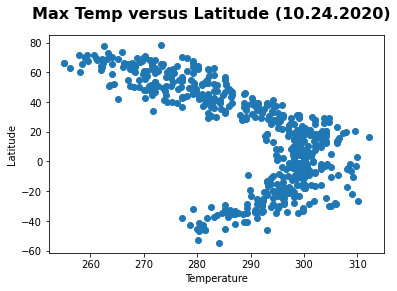

In [93]:
#Scatterplot of global Temp versus latitude
plt.suptitle("Max Temp versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['max_temp']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()
#This plot shows maximum temp of each city versus the latitude of each city. It's nifty to see the curve of the scatterplot,
#as that curve reflects the northern latitudes, then the equator, then the southern latitudes. You see more data points
#in the top of the chart because there are more cities in the Nothern hemisphere. 

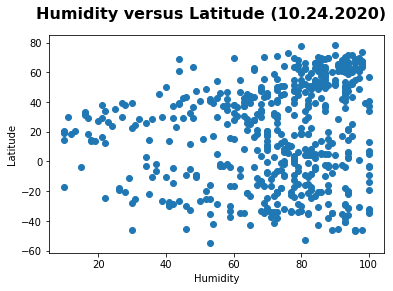

In [94]:
#Scatterplot of global Humidity versus latitude
plt.suptitle("Humidity versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['humidity']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
#This plot shows the relationship between humidity and latitude. The relationship is far less clear than the one between
#max temp and latitude. Humidity would depend on many factors (proximity to oceans, elevation, etc.) that 
#are unrealted to latitude. 


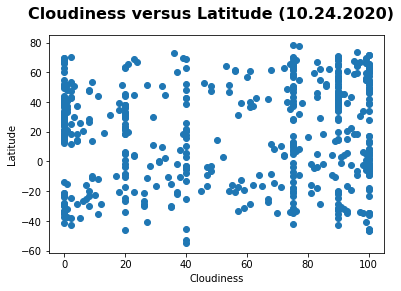

In [95]:
#Scatterplot of global Cloudiness versus latitude
plt.suptitle("Cloudiness versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['cloudiness']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
#This plot shows cloudiness versus latitude. I honestly don't know why the points are clustered into columns. 
#I would venture that these reflect larger global weather patterns such as jetstreams, etc. that would affect cloud patterns. 

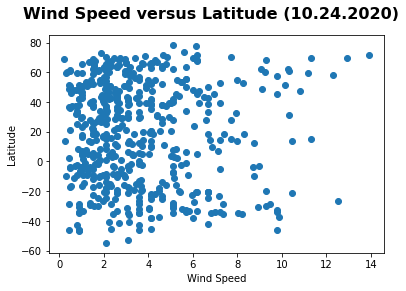

In [96]:
#Scatterplot of global Wind Speed versus latitude
plt.suptitle("Wind Speed versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['wind_speed']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
#This plot shows global windspeed versus latitude. Much like the humidity versus latitude plot, this does not show a clear
#relationship between wind speeds and latitude. Like humidity, many other factors would influence wind speed. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [97]:
#no cities have humiditiy greater than 100, although several have humidity=100. See above code. 

In [98]:
#  Get the indices of cities that have humidity over 100%.
#None have humidity >100. See above code

In [105]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = global_weather_df['humidity'].quantile(0.25)
Q3 = global_weather_df['humidity'].quantile(0.75)
mean= global_weather_df['humidity'].mean()
mean=mean
IQR = Q3 - Q1

# print (f"IQR= {IQR}, Q1= {Q1}, Q3={Q3}, mean = {mean}")



clean_global_weather_df=global_weather_df[(global_weather_df['humidity']>Q1) & (global_weather_df['humidity']<Q3)]

clean_global_weather_df

,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,city,date
0,-9.80,-139.03,299.01,75,9,8.75,PF,atuona,1603647980
4,-20.41,57.70,297.15,73,75,6.70,MU,mahebourg,1603648115
7,54.57,31.43,281.80,84,99,1.41,RU,krasnyy,1603648119
8,71.29,-156.79,270.15,73,90,3.87,US,barrow,1603648120
14,-34.42,19.23,289.26,82,98,0.89,ZA,hermanus,1603648128
...,...,...,...,...,...,...,...,...,...
530,29.96,122.30,290.77,68,3,2.59,CN,shenjiamen,1603648804
533,4.38,-7.72,299.52,81,72,3.32,LR,harper,1603648809
534,8.46,25.68,297.59,63,77,0.82,SS,raga,1603648811
539,8.08,22.40,295.61,75,69,2.10,CF,ouadda,1603648818


In [ ]:

#If I use the clean_global_weather_df to run the scatterplots, I will have less than 500 points, since removing the outliers
#brings my count down to 253. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

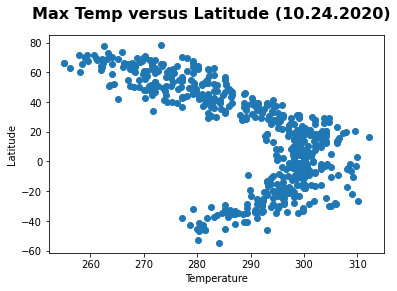

In [110]:
#Scatterplot of global Temp versus latitude
plt.suptitle("Max Temp versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['max_temp']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()
#This plot shows maximum temp of each city versus the latitude of each city. It's nifty to see the curve of the scatterplot,
#as that curve reflects the northern latitudes, then the equator, then the southern latitudes. You see more data points
#in the top of the chart because there are more cities in the Nothern hemisphere. 

## Latitude vs. Humidity Plot

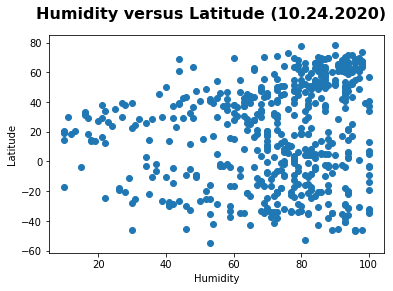

In [111]:
#Scatterplot of global Humidity versus latitude
plt.suptitle("Humidity versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['humidity']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()
#This plot shows the relationship between humidity and latitude. The relationship is far less clear than the one between
#max temp and latitude. Humidity would depend on many factors (proximity to oceans, elevation, etc.) that 
#are unrealted to latitude. 

## Latitude vs. Cloudiness Plot

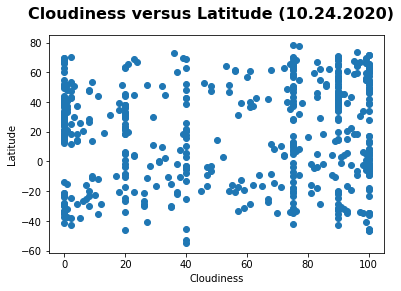

In [112]:
#Scatterplot of global Cloudiness versus latitude
plt.suptitle("Cloudiness versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['cloudiness']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()
#This plot shows cloudiness versus latitude. I honestly don't know why the points are clustered into columns. 
#I would venture that these reflect larger global weather patterns such as jetstreams, etc. that would affect cloud patterns. 

## Latitude vs. Wind Speed Plot

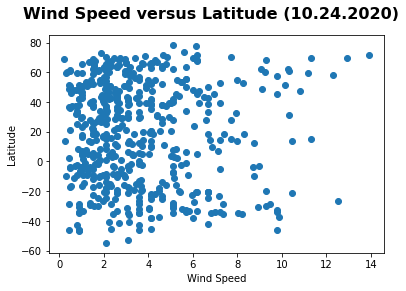

In [113]:
#Scatterplot of global Wind Speed versus latitude
plt.suptitle("Wind Speed versus Latitude (10.24.2020)", fontsize=16, fontweight="bold")
x_values = global_weather_df['wind_speed']
y_values = global_weather_df['latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()
#This plot shows global windspeed versus latitude. Much like the humidity versus latitude plot, this does not show a clear
#relationship between wind speeds and latitude. Like humidity, many other factors would influence wind speed. 

## Linear Regression

In [106]:
clean_global_weather_df[clean_global_weather_df["latitude"]>-1]

northern_hemisphere_df=clean_global_weather_df[clean_global_weather_df["latitude"]>-1]
northern_hemisphere_df


,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,city,date
7,54.57,31.43,281.80,84,99,1.41,RU,krasnyy,1603648119
8,71.29,-156.79,270.15,73,90,3.87,US,barrow,1603648120
17,39.64,141.95,282.73,78,58,1.99,JP,miyako,1603648131
19,50.68,156.12,279.51,82,48,2.28,RU,severo-kurilsk,1603648133
21,18.70,-95.50,300.28,80,96,4.19,MX,mundo nuevo,1603648136
...,...,...,...,...,...,...,...,...,...
530,29.96,122.30,290.77,68,3,2.59,CN,shenjiamen,1603648804
533,4.38,-7.72,299.52,81,72,3.32,LR,harper,1603648809
534,8.46,25.68,297.59,63,77,0.82,SS,raga,1603648811
539,8.08,22.40,295.61,75,69,2.10,CF,ouadda,1603648818


In [107]:
southern_hemisphere_df=clean_global_weather_df[clean_global_weather_df["latitude"]<1]
southern_hemisphere_df

,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,city,date
0,-9.80,-139.03,299.01,75,9,8.75,PF,atuona,1603647980
4,-20.41,57.70,297.15,73,75,6.70,MU,mahebourg,1603648115
14,-34.42,19.23,289.26,82,98,0.89,ZA,hermanus,1603648128
18,-33.93,18.42,290.93,72,20,9.80,ZA,cape town,1603647762
20,-21.20,-175.20,296.62,82,26,10.45,TO,vaini,1603648134
...,...,...,...,...,...,...,...,...,...
494,-35.35,150.47,287.04,82,90,8.20,AU,ulladulla,1603648752
496,-15.92,-46.11,301.34,67,81,2.90,BR,arinos,1603648754
500,-12.58,13.41,297.71,78,58,3.65,AO,benguela,1603648759
501,-28.78,32.04,296.19,79,61,7.34,ZA,richards bay,1603648760


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

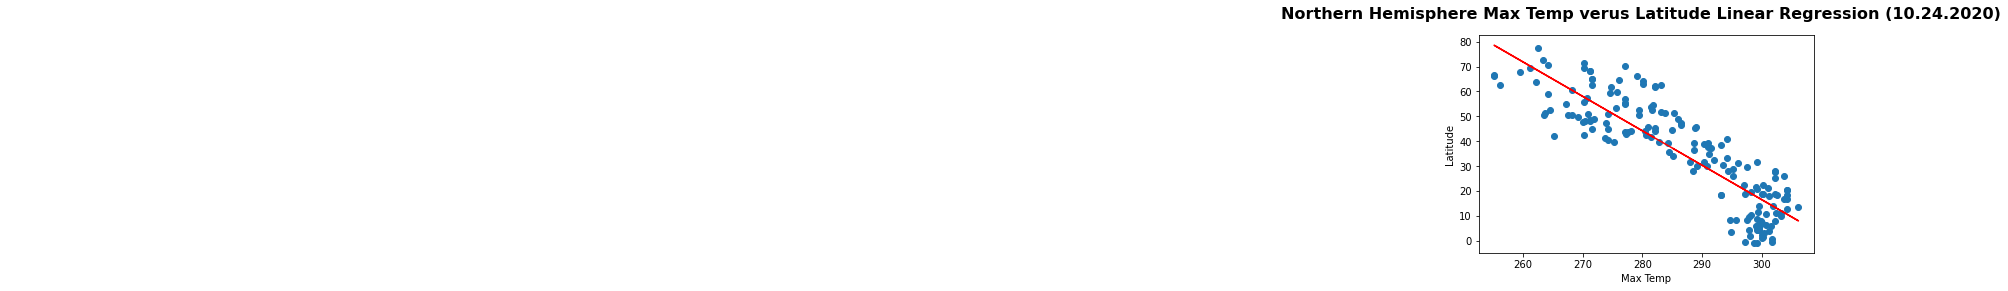

In [108]:

plt.suptitle("Northern Hemisphere Max Temp verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = northern_hemisphere_df['max_temp']
y_values = northern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
#The plot of the northern hemisphere shows a strong correlation between lower latitudes and higher temperatures. Which makes
#sense--as we approach the Equator, things tend to heat up. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

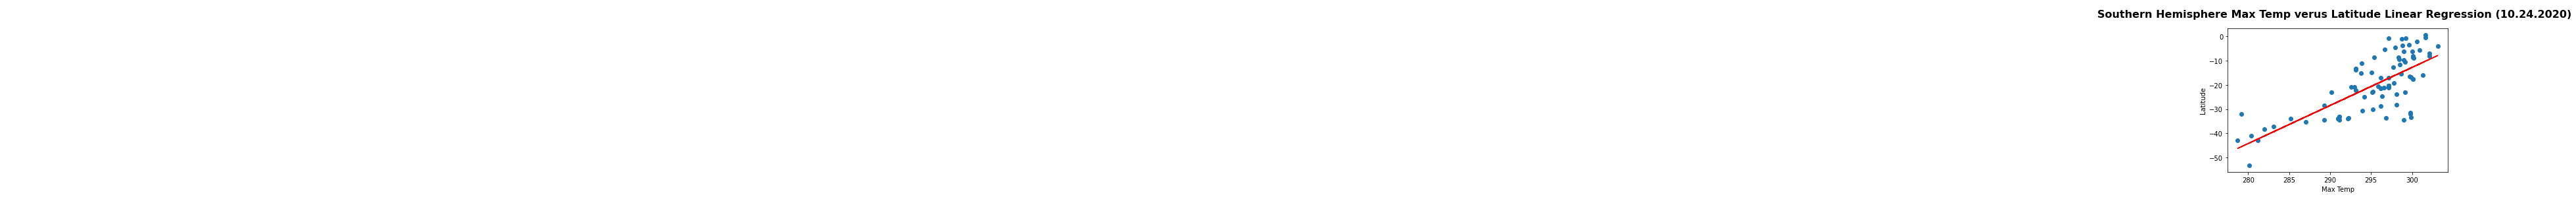

In [109]:

plt.suptitle("Southern Hemisphere Max Temp verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = southern_hemisphere_df['max_temp']
y_values = southern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()
#This plot shows the same trend as the previous--as you approach the equator, temperatures increase. As  you approach the
#higher/more southerly latitudes, the temps decrase. Again, there are fewer points on this plot because there are fewer
#cities in the southern hemisphere to include in the data. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

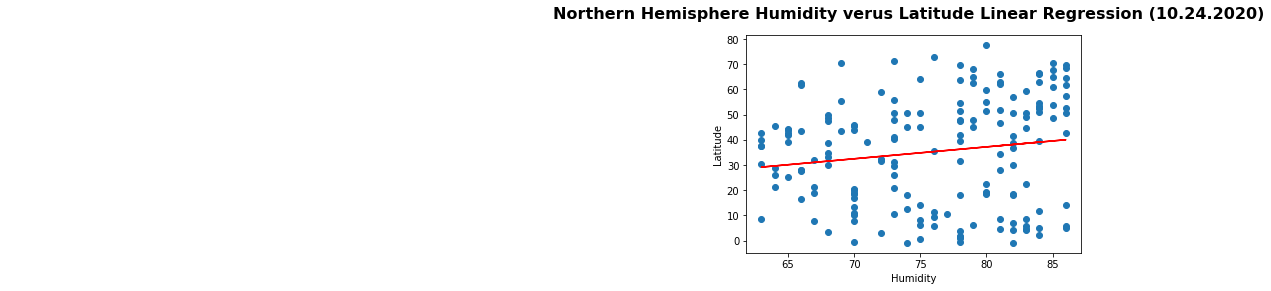

In [117]:

plt.suptitle("Northern Hemisphere Humidity verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = northern_hemisphere_df['humidity']
y_values = northern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

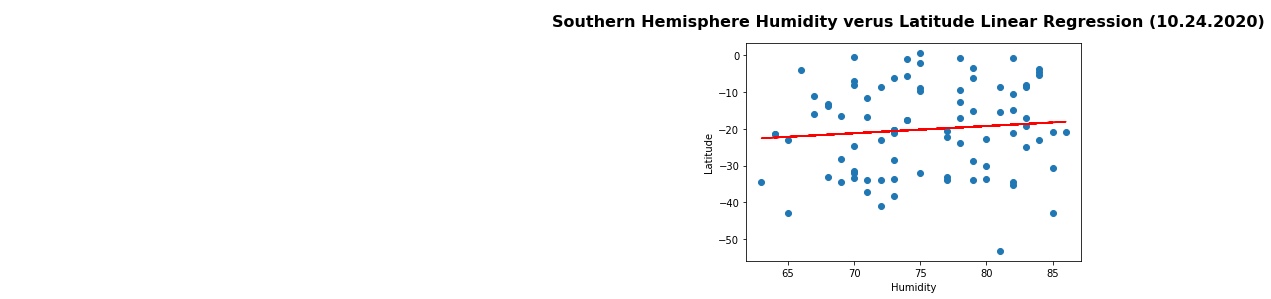

In [118]:

plt.suptitle("Southern Hemisphere Humidity verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = southern_hemisphere_df['humidity']
y_values = southern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

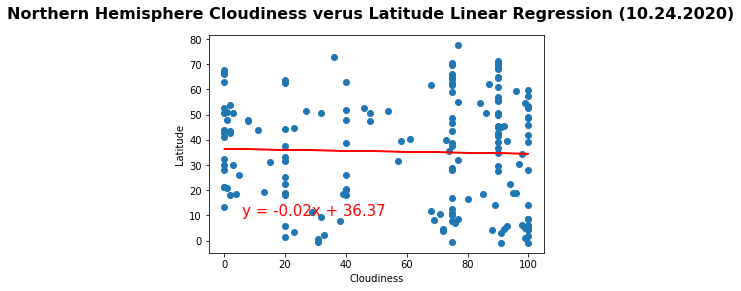

In [119]:
plt.suptitle("Northern Hemisphere Cloudiness verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = northern_hemisphere_df['cloudiness']
y_values = northern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

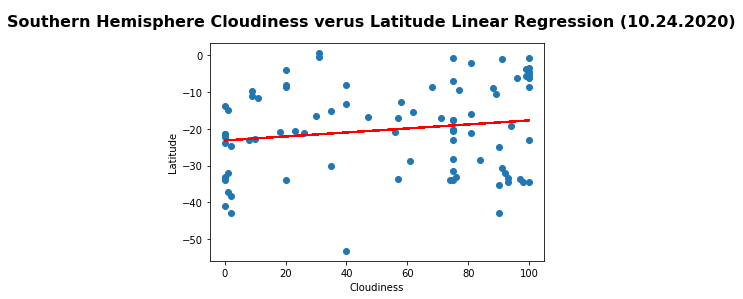

In [120]:

plt.suptitle("Southern Hemisphere Cloudiness verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = southern_hemisphere_df['cloudiness']
y_values = southern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

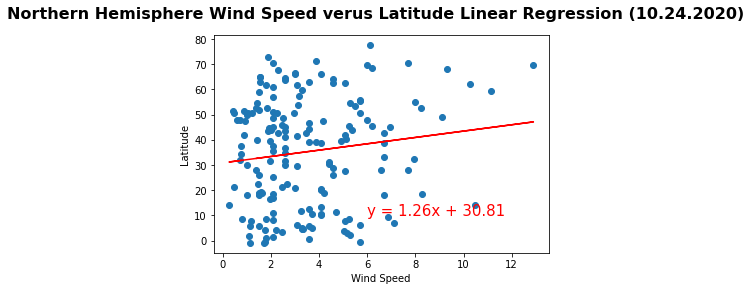

In [121]:
plt.suptitle("Northern Hemisphere Wind Speed verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = northern_hemisphere_df['wind_speed']
y_values = northern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

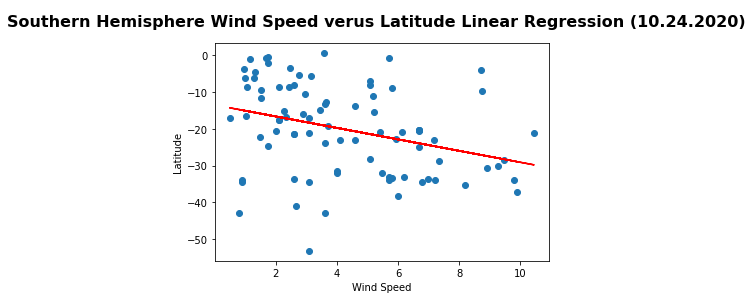

In [122]:

plt.suptitle("Southern Hemisphere Wind Speed verus Latitude Linear Regression (10.24.2020)", fontsize=16, fontweight="bold")

x_values = southern_hemisphere_df['wind_speed']
y_values = southern_hemisphere_df['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()